In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
# Load Wine Quality dataset
data = pd.read_csv('/content/winequality-red.csv')

In [26]:
# Convert the quality column to binary labels for classification
data['quality'] = (data['quality'] >= 7).astype(int)

In [27]:
# Define features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=60)

In [29]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [31]:
# Building the MLP model using Sequential model
model = Sequential()
# Layer 1
model.add(Dense(128, input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
# Layer 2
model.add(Dense(64))
model.add(Activation('relu'))
# Output layer
model.add(Dense(2))
model.add(Activation('softmax'))

In [32]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print information about the built model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1536      
                                                                 
 activation_3 (Activation)   (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
 activation_5 (Activation)   (None, 2)                 0         
                                                                 
Total params: 9922 (38.76 KB)
Trainable params: 9922 (

In [33]:
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
7/7 [==============================] - 2s 65ms/step - loss: 0.6926 - accuracy: 0.5203 - val_loss: 0.5549 - val_accuracy: 0.8750
Epoch 2/10
7/7 [==============================] - 0s 15ms/step - loss: 0.4732 - accuracy: 0.8679 - val_loss: 0.4432 - val_accuracy: 0.8958
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3995 - accuracy: 0.8667 - val_loss: 0.3994 - val_accuracy: 0.8958
Epoch 4/10
7/7 [==============================] - 0s 7ms/step - loss: 0.3590 - accuracy: 0.8667 - val_loss: 0.3759 - val_accuracy: 0.8958
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3232 - accuracy: 0.8667 - val_loss: 0.3583 - val_accuracy: 0.8854
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2967 - accuracy: 0.8830 - val_loss: 0.3466 - val_accuracy: 0.8750
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2798 - accuracy: 0.8841 - val_loss: 0.3389 - val_accuracy: 0.8646
Epoch 8/10
7/7 [==============

20/20 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.8734
Test accuracy: 0.8734375238418579
Test loss:  0.2957970201969147


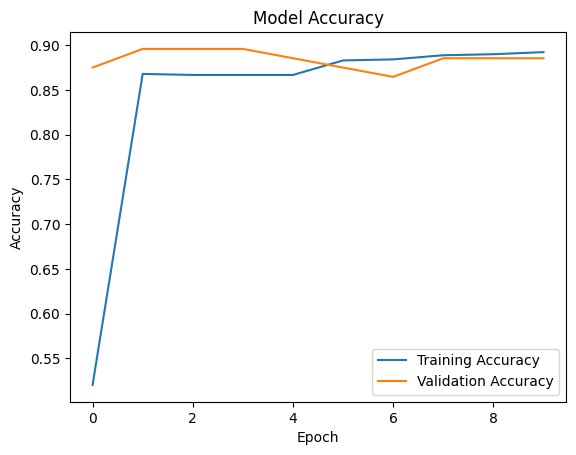

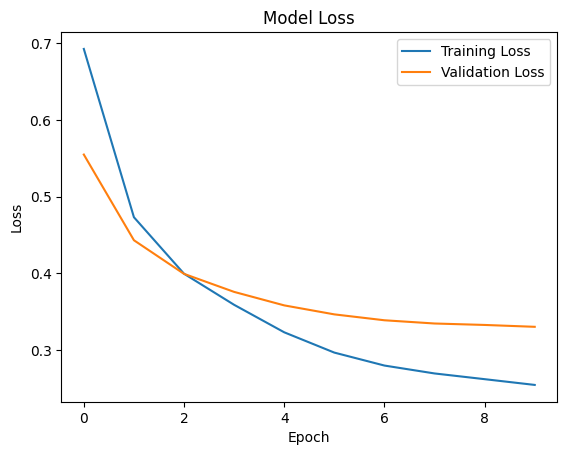

In [34]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)
print("Test loss: ", test_loss)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()